
---


#  🟢 Plota Heatmap de Anos (eixo y) X Meses (eixo x) para o Brasil entre 2003 e 2025


---



 - Dados: Focos de calor do INPE na frequência anual - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/EstadosBr_sat_ref/MG/

- Dados: Focos de calor do INPE na frequência mensal - https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/mensal/Brasil/

---
**REALIZAÇÃO**:


- Realizado por: Enrique V. Mattos - 04/09/2025
- E-mail: enrique@unifei.edu.br
- GitHub: https://github.com/evmpython
- Lattes: http://lattes.cnpq.br/8010078550088178




# **1° Passo:** Preparando ambiente

In [1]:
# instalações
!pip install -q ultraplot

# Bibliotecas para manipulação de arquivos e sistema
import glob                                 # Lista arquivos em diretórios usando padrões (ex: *.nc)
import time                                 # Medição de tempo de execução e operações relacionadas a tempo

# Bibliotecas para computação numérica e dados
import numpy as np                          # Operações matemáticas eficientes com arrays multidimensionais
import pandas as pd                         # Manipulação e análise de dados em estruturas tabulares (DataFrames)
import xarray as xr                         # Trabalho com arrays multidimensionais rotulados (comum em dados científicos)

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt             # Criação de gráficos e visualizações 2D/3D (biblioteca base)
import ultraplot as uplt                    # Visualização especializada para dados meteorológicos
import seaborn as sns

# Controle de avisos
import warnings                             # Gerenciamento de mensagens de alerta durante a execução
warnings.filterwarnings("ignore")           # Supressão de avisos para manter a saída limpa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 29.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


# **2° Passo:** Lendo os Dados do INPE

## Lendo os dados de 2003-2024
- São os dados por `ANO` do `Brasil` do satélite de referência `AQUA`.

In [2]:
%%time
# cria uma tabela vazia
df_2003_a_2024 = pd.DataFrame()

# FTP dos dados anual do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/anual/Brasil_sat_ref/'

# ano inicial e final: neste caso de 2003 a 2024
anoi, anof = '2003', '2025'

# loop dos meses
for ano in range(int(anoi), int(anof)):
    print(ano)

    # nome do arquivo
    filename = f'focos_br_ref_{str(ano)}.zip'

    # leitura da tabela: 2023
    df0 = pd.read_csv(f'{url}focos_br_ref_{str(ano)}.zip', compression='zip')

    # junta a tabela que foi lida com a anterior
    df_2003_a_2024 = pd.concat([df0, df_2003_a_2024], ignore_index=True)

# remove colunas
df_2003_a_2024.drop(['id_bdq','foco_id','pais'], axis=1, inplace=True)

# renomeia coluna
df_2003_a_2024.rename(columns={'data_pas': 'data'}, inplace=True)

# reposiciona as colunas
df_2003_a_2024 = df_2003_a_2024[['data','lat','lon','municipio','estado','bioma']]

# mostra o dataframe
df_2003_a_2024

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
CPU times: user 12.8 s, sys: 1.77 s, total: 14.6 s
Wall time: 1min 4s


,data,lat,lon,municipio,estado,bioma
0,2024-01-02 17:04:00,-15.89572,-38.89957,BELMONTE,BAHIA,Mata Atlântica
1,2024-01-02 17:06:00,-7.49188,-38.88316,BREJO SANTO,CEARÁ,Caatinga
2,2024-01-02 17:06:00,-6.50564,-39.44122,CARIÚS,CEARÁ,Caatinga
3,2024-01-02 17:06:00,-6.50409,-39.43422,CARIÚS,CEARÁ,Caatinga
4,2024-01-02 17:06:00,-5.74166,-39.59352,MOMBAÇA,CEARÁ,Caatinga
...,...,...,...,...,...,...
5107968,2003-09-26 16:30:00,-11.71700,-49.33000,DUERÉ,TOCANTINS,Cerrado
5107969,2003-09-26 18:08:00,-13.65700,-57.39400,DIAMANTINO,MATO GROSSO,Cerrado
5107970,2003-10-07 16:13:00,-5.87600,-44.64400,TUNTUM,MARANHÃO,Cerrado
5107971,2003-10-09 17:37:00,-12.27900,-60.48900,VILHENA,RONDÔNIA,Amazônia


## Lendo os dados de 2025
- São os dados por `MÊS` do `Brasil` de `TODOS` satélites.

In [3]:
%%time
# cria uma tabela
df_2025 = pd.DataFrame()

# FTP dos dados mensal de 2025 do satélite AQUA
url = 'https://dataserver-coids.inpe.br/queimadas/queimadas/focos/csv/mensal/Brasil/'

# loop dos meses de 2025, até o mês 09
for data in pd.date_range('20250101','20251001', freq='1M'):

    # extrai ano e mês
    ano = data.strftime('%Y')
    mes = data.strftime('%m')
    print(ano, mes)

    # nome do arquivo
    filename = f'focos_mensal_br_{ano}{mes}.csv'

    # leitura da tabela
    df0 = pd.read_csv(f'{url}{filename}')

    # junta a tabela que foi lida com a anterior
    df_2025 = pd.concat([df_2025, df0], ignore_index=True)

# seleciona apenas para MG e para o satélite de referência AQUA_M-T
#df_2025 = df_2025[ (df_2025['estado']=='MINAS GERAIS') & (df_2025['satelite']=='AQUA_M-T') ]
df_2025 = df_2025[ df_2025['satelite'] == 'AQUA_M-T' ]

# renomeia coluna
df_2025.rename(columns={'data_hora_gmt': 'data'}, inplace=True)

# reposiciona as colunas
df_2025 = df_2025[['data','lat','lon','municipio','estado','bioma']]

# mostra tabela
df_2025

2025 01
2025 02
2025 03
2025 04
2025 05
2025 06
2025 07
2025 08
2025 09
CPU times: user 3.01 s, sys: 446 ms, total: 3.45 s
Wall time: 35.7 s


,data,lat,lon,municipio,estado,bioma
1419,2025-01-01 16:52:00,-8.70136,-36.58537,CAPOEIRAS,PERNAMBUCO,Caatinga
1420,2025-01-01 16:52:00,-7.25636,-38.53855,BONITO DE SANTA FÉ,PARAÍBA,Caatinga
1421,2025-01-01 16:52:00,-7.60073,-37.72230,SOLIDÃO,PERNAMBUCO,Caatinga
1422,2025-01-01 16:52:00,-12.31578,-37.87934,ENTRE RIOS,BAHIA,Mata Atlântica
1423,2025-01-01 16:52:00,-12.30725,-37.89272,ENTRE RIOS,BAHIA,Mata Atlântica
...,...,...,...,...,...,...
1390123,2025-09-03 19:08:00,-3.20710,-60.60226,MANACAPURU,AMAZONAS,Amazônia
1390124,2025-09-03 19:08:00,-3.80178,-65.10154,ALVARÃES,AMAZONAS,Amazônia
1390125,2025-09-03 19:08:00,-5.27116,-60.41924,NOVO ARIPUANÃ,AMAZONAS,Amazônia
1390126,2025-09-03 19:08:00,-5.27282,-60.43021,NOVO ARIPUANÃ,AMAZONAS,Amazônia


## Junta os dados de 2003-2024 com 2025

In [4]:
# junta os dataframes
df = pd.concat([df_2003_a_2024, df_2025], ignore_index=True)

# transforma a coluna "datahora" para o formato "datetime"
df['data'] = pd.to_datetime(df['data'])

# seta a coluna "datahora" como o índice da tabela
df.set_index('data', inplace=True)

# mostra o dataframe final
df

,lat,lon,municipio,estado,bioma
data,,,,,
2024-01-02 17:04:00,-15.89572,-38.89957,BELMONTE,BAHIA,Mata Atlântica
2024-01-02 17:06:00,-7.49188,-38.88316,BREJO SANTO,CEARÁ,Caatinga
2024-01-02 17:06:00,-6.50564,-39.44122,CARIÚS,CEARÁ,Caatinga
2024-01-02 17:06:00,-6.50409,-39.43422,CARIÚS,CEARÁ,Caatinga
2024-01-02 17:06:00,-5.74166,-39.59352,MOMBAÇA,CEARÁ,Caatinga
...,...,...,...,...,...
2025-09-03 19:08:00,-3.20710,-60.60226,MANACAPURU,AMAZONAS,Amazônia
2025-09-03 19:08:00,-3.80178,-65.10154,ALVARÃES,AMAZONAS,Amazônia
2025-09-03 19:08:00,-5.27116,-60.41924,NOVO ARIPUANÃ,AMAZONAS,Amazônia


# **3° Passo:** Agrupando os dados por mês

In [10]:
# mostra os dados que serão utilizados
df.tail(2)

,lat,lon,municipio,estado,bioma
data,,,,,
2025-09-03 19:08:00,-5.27282,-60.43021,NOVO ARIPUANÃ,AMAZONAS,Amazônia
2025-09-03 19:08:00,-3.40381,-59.58965,CAREIRO DA VÁRZEA,AMAZONAS,Amazônia


In [6]:
%%time
# agrupa os dados por "MÊS"
#df_mes = df.groupby('estado').get_group('MINAS GERAIS').groupby(pd.Grouper(freq='1M')).count()['estado']
df_mes = df.groupby(pd.Grouper(freq='1M')).count()['estado']

# preenche com zeros os meses de 2025 que ainda não chegaram
ano_mes_dia = []

ano_mesi, ano_mesf = f'{str(anoi)}0101', f'{str(2025)}1231'

for data in pd.date_range(ano_mesi, ano_mesf, freq='1M'):
    ano_mes_dia.append(data.strftime('%Y-%m-%d'))

datas = np.array(ano_mes_dia)

df_mes = df_mes.reindex(datas, fill_value=np.nan)

# mostra os dados
df_mes

CPU times: user 1.51 s, sys: 221 ms, total: 1.73 s
Wall time: 1.74 s


,estado
data,
2003-01-31,6697.0
2003-02-28,3099.0
2003-03-31,3549.0
2003-04-30,3643.0
2003-05-31,6448.0
...,...
2025-08-31,18451.0
2025-09-30,2626.0
2025-10-31,NaN


In [7]:
# valores
df_mes.values

array([  6697.,   3099.,   3549.,   3643.,   6448.,  16752.,  30391.,
        57004.,  97758.,  57495.,  35421.,  22980.,   3883.,   1932.,
         2928.,   2956.,   6609.,  18024.,  30356.,  64067., 121395.,
        54292.,  45364.,  28639.,   7057.,   2898.,   2528.,   2743.,
         5075.,   7854.,  30238.,  90729., 102455.,  65023.,  31631.,
        14332.,   4531.,   2387.,   2426.,   2269.,   4313.,   7601.,
        17788.,  54630.,  76475.,  32043.,  29302.,  15414.,   4220.,
         2761.,   3340.,   2550.,   5123.,  12716.,  19931.,  91085.,
       141220.,  67228.,  31421.,  12320.,   2777.,   1751.,   1887.,
         1906.,   2951.,   4594.,  14029.,  34431.,  50671.,  51784.,
        30724.,  14428.,   3874.,   1396.,   2002.,   2290.,   3138.,
         3795.,   7824.,  21782.,  36116.,  31215.,  29396.,  12274.,
         3683.,   2908.,   2863.,   2681.,   4196.,   9894.,  21030.,
        90444., 109030.,  38841.,  24052.,   9761.,   1888.,   1127.,
         1265.,   16

In [8]:
# matriz com formato de anos x meses
focos_table = np.reshape(df_mes.values, ((2025-2003)+1, 12), order='C')
focos_table

array([[  6697.,   3099.,   3549.,   3643.,   6448.,  16752.,  30391.,
         57004.,  97758.,  57495.,  35421.,  22980.],
       [  3883.,   1932.,   2928.,   2956.,   6609.,  18024.,  30356.,
         64067., 121395.,  54292.,  45364.,  28639.],
       [  7057.,   2898.,   2528.,   2743.,   5075.,   7854.,  30238.,
         90729., 102455.,  65023.,  31631.,  14332.],
       [  4531.,   2387.,   2426.,   2269.,   4313.,   7601.,  17788.,
         54630.,  76475.,  32043.,  29302.,  15414.],
       [  4220.,   2761.,   3340.,   2550.,   5123.,  12716.,  19931.,
         91085., 141220.,  67228.,  31421.,  12320.],
       [  2777.,   1751.,   1887.,   1906.,   2951.,   4594.,  14029.,
         34431.,  50671.,  51784.,  30724.,  14428.],
       [  3874.,   1396.,   2002.,   2290.,   3138.,   3795.,   7824.,
         21782.,  36116.,  31215.,  29396.,  12274.],
       [  3683.,   2908.,   2863.,   2681.,   4196.,   9894.,  21030.,
         90444., 109030.,  38841.,  24052.,   9761.],


# **4° Passo:** Plota Figura

In [38]:
df.head(2)

,lat,lon,municipio,estado,bioma
data,,,,,
2024-01-02 17:04:00,-15.89572,-38.89957,BELMONTE,BAHIA,Mata Atlântica
2024-01-02 17:06:00,-7.49188,-38.88316,BREJO SANTO,CEARÁ,Caatinga


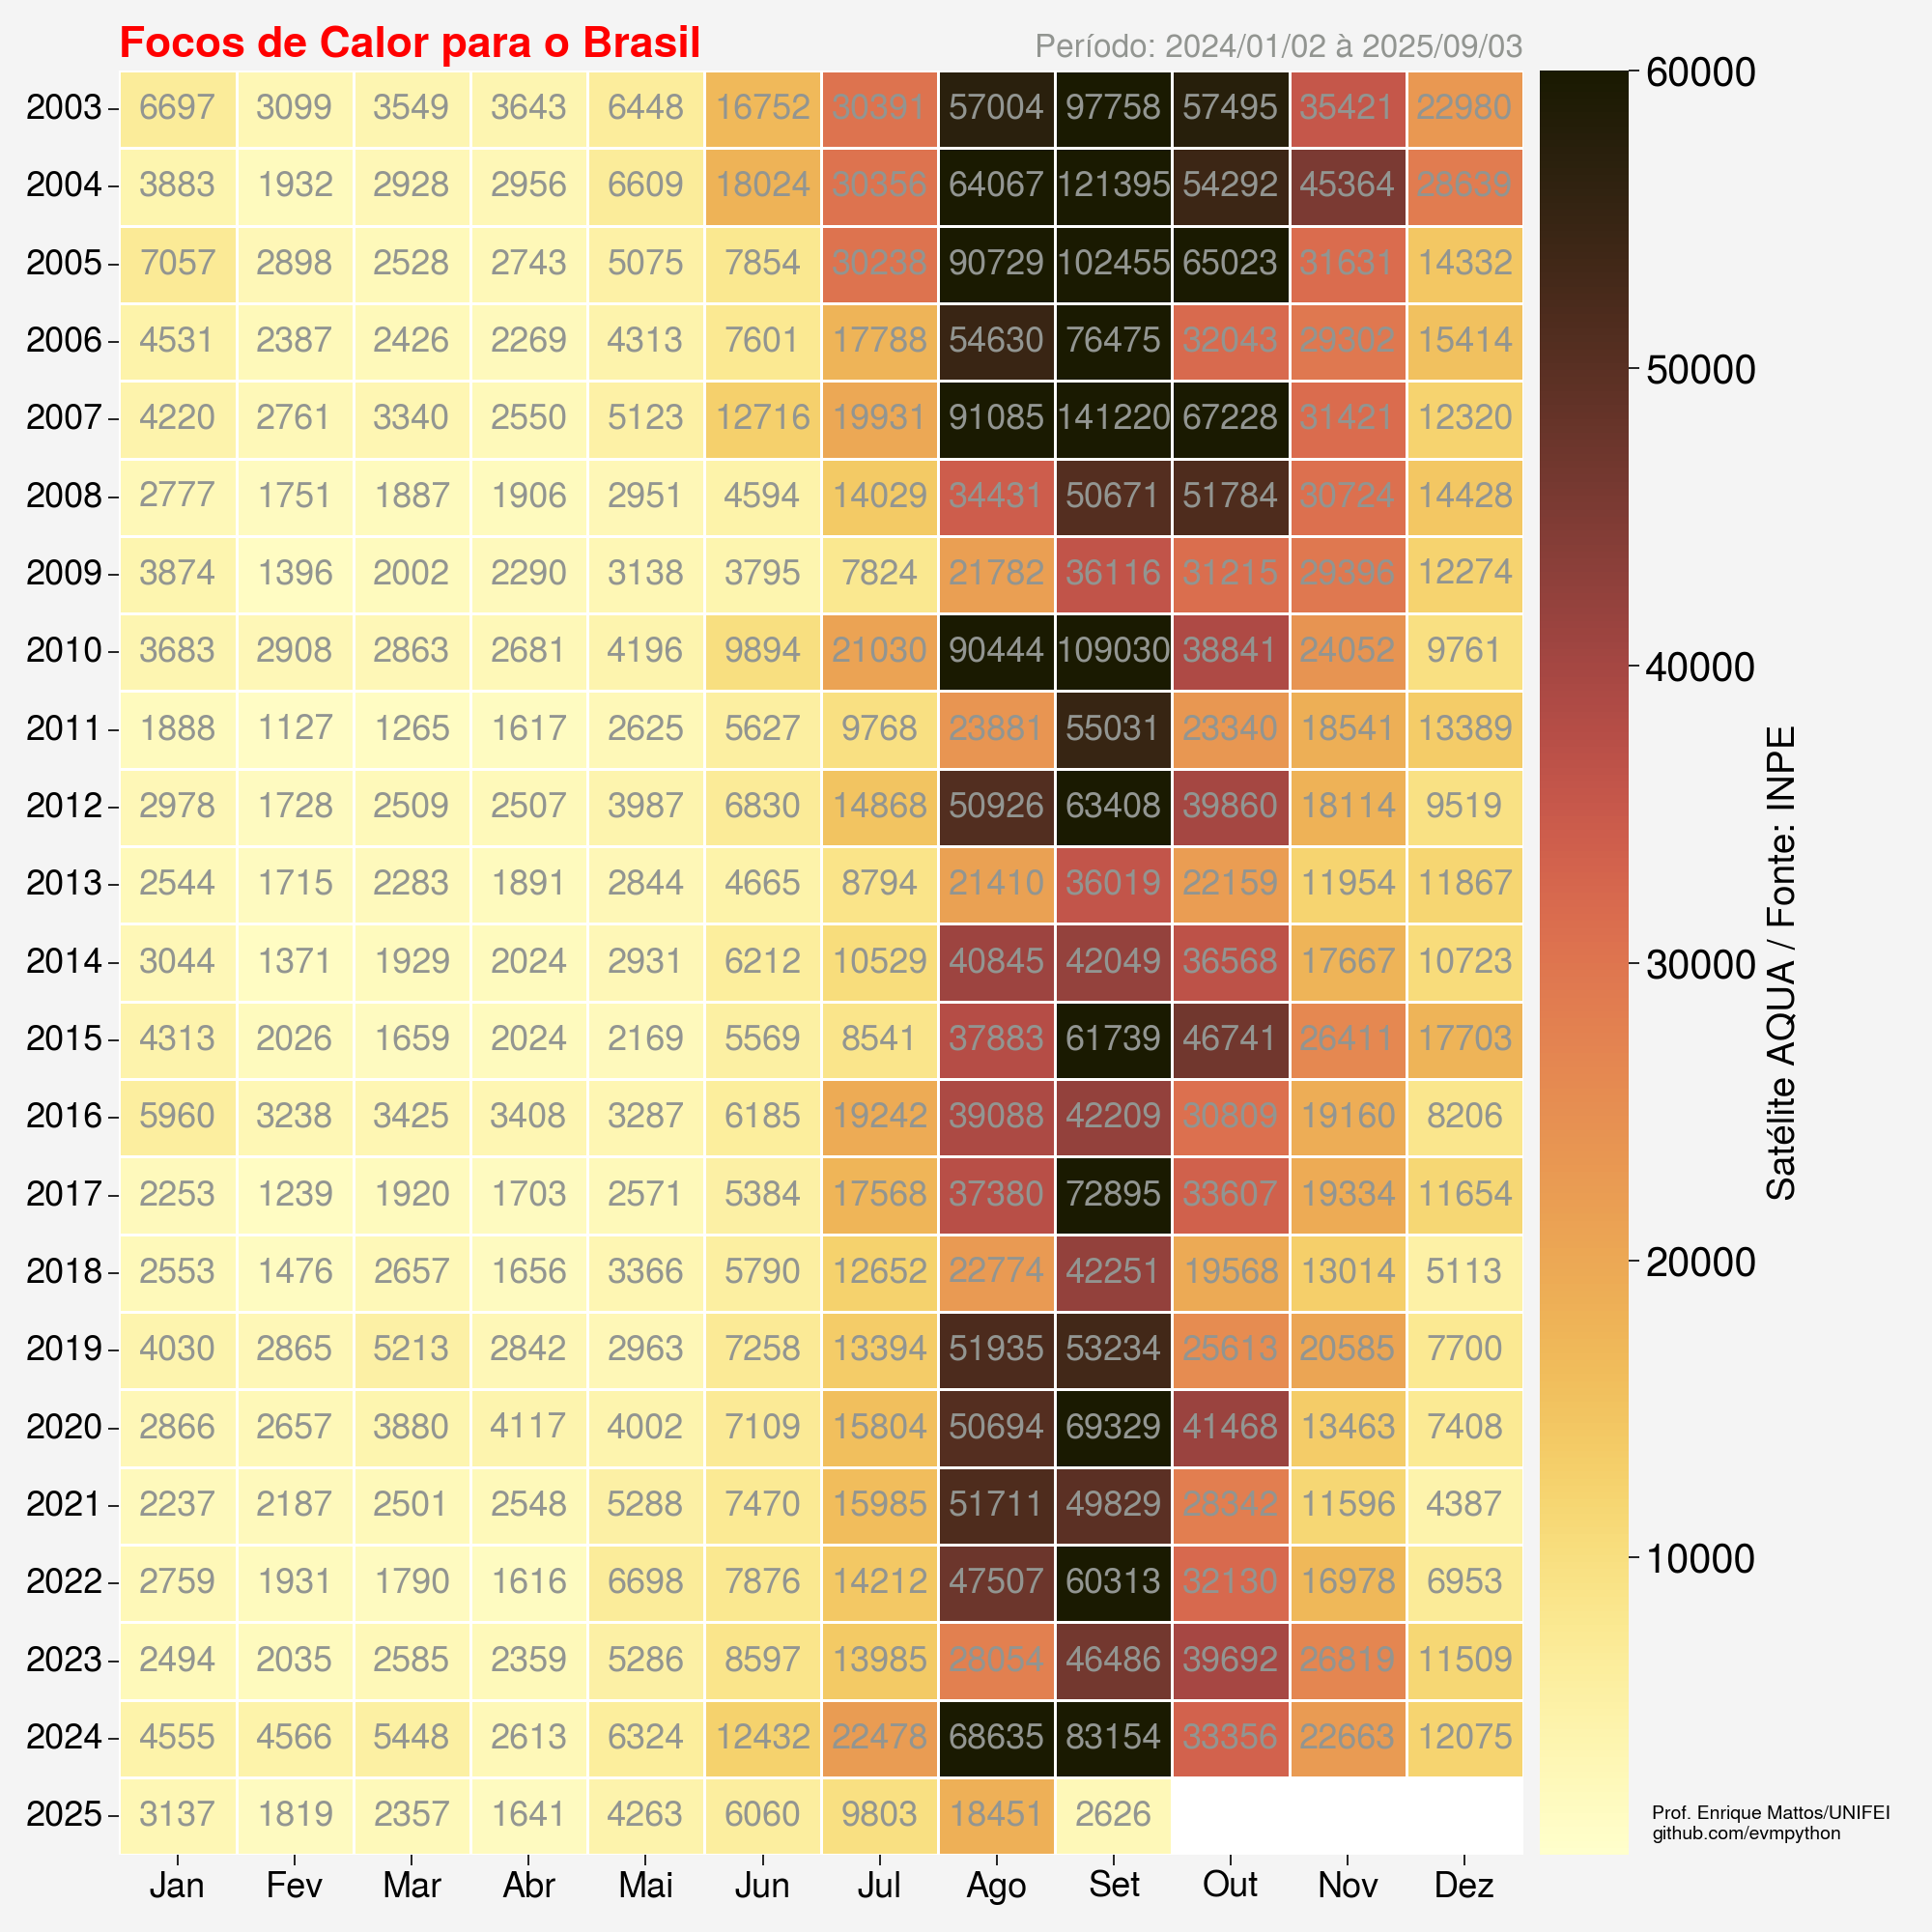

CPU times: user 2.2 s, sys: 73.1 ms, total: 2.27 s
Wall time: 2.3 s


In [43]:
%%time
#========================================================#
#               DEFINIÇÕES INICIAIS
#========================================================#
# moldura da figura
fig, ax = plt.subplots(figsize=(10,10))

# criando heatmap com seaborn
sns.heatmap(focos_table,
            vmin=0.1, vmax=60000,
            cmap='lajolla',
            xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
            yticklabels=uplt.arange(2003, 2025, 1),
            linewidth=0.5,
            linecolor='white',
            cbar_kws={'label': ' ',
                      'shrink': 1.0,
                      'pad': 0.01,
                      'orientation': 'vertical'},
            annot=True, fmt=".0f",
            annot_kws={'color': 'gray',
                       'fontsize': 13,
                       'fontweight': 'medium'})

# configurações da barra de cores
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15, axis="both")
cbar.set_label('Satélite AQUA / Fonte: INPE', fontsize=14)
cbar.ax.minorticks_off()

# título
anoix, mesix, diaix = str(df.head(1).index.year[0]), str(df.head(1).index.month[0]), str(df.head(1).index.day[0])
anofx, mesfx, diafx = str(df.tail(1).index.year[0]), str(df.tail(1).index.month[0]), str(df.tail(1).index.day[0])
ax.set_title('Focos de Calor para o Brasil', fontsize=16, color='red', fontweight='bold', loc='left')
ax.set_title(f'Período: {anoix}/{mesix.zfill(2)}/{diaix.zfill(2)} à {anofx}/{mesfx.zfill(2)}/{diafx.zfill(2)}', fontsize=12, color='gray', loc='right')

# retirar os minorticks
ax.minorticks_off()

# retirar a grade
plt.grid(False)

# orientações labels do eixo Y
plt.yticks(rotation=0, fontsize=13)
plt.xticks(rotation=0, fontsize=13)

# informação na figura
ax.text(13.1, 22.8, 'Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', fontsize=7, color='black', zorder=5)

# salva figura
plt.tight_layout()
plt.savefig('07_focos_heatmap.jpg', bbox_inches='tight', dpi=300)
plt.show()